In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import GradientBoostingClassifier  #GBM algorithm
from sklearn import cross_validation, metrics   #Additional scklearn functions
from sklearn.grid_search import GridSearchCV   #Perforing grid search

import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 4

data = pd.read_csv('LargeTrain1.csv')
train = pd.DataFrame(data)
target = 'Class'

C:\Users\test\Anaconda2\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\test\Anaconda2\lib\site-packages\sklearn\grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [2]:
def modelfit(alg, dtrain, predictors, performCV=True, printFeatureImportance=True, cv_folds=5):
    #Fit the algorithm on the data
    alg.fit(dtrain[predictors], dtrain['Class'])
        
    #Predict training set:
    dtrain_predictions = alg.predict(dtrain[predictors])
    dtrain_predprob = alg.predict_proba(dtrain[predictors])[:,1]
    
    #Perform cross-validation:
    if performCV:
        cv_score = cross_validation.cross_val_score(alg, dtrain[predictors], dtrain['Class'], cv=cv_folds)
    
    #Print model report:
    print "\nModel Report"
    print "Accuracy : %.4g" % metrics.accuracy_score(dtrain['Class'].values, dtrain_predictions)
    
    if performCV:
        print "CV Score : Mean - %.7g | Std - %.7g | Min - %.7g | Max - %.7g" % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score))
        
    #Print Feature Importance:
    if printFeatureImportance:
        feat_imp = pd.Series(alg.feature_importances_, predictors).sort_values(ascending=False)
        feat_imp.plot(kind='bar', title='Feature Importances')
        plt.ylabel('Feature Importance Score')

In [6]:
predictors = [x for x in train.columns if x not in [target]]
param_test1 = {'n_estimators':range(20,81,10)}
gsearch1 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, min_samples_split=500,min_samples_leaf=50,max_depth=8,max_features='sqrt',subsample=0.8,random_state=10), 
param_grid = param_test1,n_jobs=4,iid=False, cv=5)
gsearch1.fit(train[predictors],train[target])
gsearch1.grid_scores_, gsearch1.best_params_, gsearch1.best_score_

([mean: 0.98629, std: 0.00121, params: {'n_estimators': 20},
  mean: 0.99043, std: 0.00075, params: {'n_estimators': 30},
  mean: 0.99365, std: 0.00094, params: {'n_estimators': 40},
  mean: 0.99411, std: 0.00102, params: {'n_estimators': 50},
  mean: 0.99439, std: 0.00121, params: {'n_estimators': 60},
  mean: 0.99448, std: 0.00116, params: {'n_estimators': 70},
  mean: 0.99466, std: 0.00111, params: {'n_estimators': 80}],
 {'n_estimators': 80},
 0.9946641181283745)

In [3]:
param_test2 = {'max_depth':range(5,16,2), 'min_samples_split':range(200,1001,200)}
gsearch2 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, n_estimators=80, max_features='sqrt', subsample=0.8, random_state=10), 
param_grid = param_test2,n_jobs=4,iid=False, cv=5)
gsearch2.fit(train[predictors],train[target])
gsearch2.grid_scores_, gsearch2.best_params_, gsearch2.best_score_

([mean: 0.99512, std: 0.00068, params: {'min_samples_split': 200, 'max_depth': 5},
  mean: 0.99420, std: 0.00080, params: {'min_samples_split': 400, 'max_depth': 5},
  mean: 0.99494, std: 0.00077, params: {'min_samples_split': 600, 'max_depth': 5},
  mean: 0.99485, std: 0.00067, params: {'min_samples_split': 800, 'max_depth': 5},
  mean: 0.99485, std: 0.00102, params: {'min_samples_split': 1000, 'max_depth': 5},
  mean: 0.99531, std: 0.00094, params: {'min_samples_split': 200, 'max_depth': 7},
  mean: 0.99512, std: 0.00062, params: {'min_samples_split': 400, 'max_depth': 7},
  mean: 0.99485, std: 0.00089, params: {'min_samples_split': 600, 'max_depth': 7},
  mean: 0.99485, std: 0.00106, params: {'min_samples_split': 800, 'max_depth': 7},
  mean: 0.99503, std: 0.00131, params: {'min_samples_split': 1000, 'max_depth': 7},
  mean: 0.99568, std: 0.00095, params: {'min_samples_split': 200, 'max_depth': 9},
  mean: 0.99522, std: 0.00111, params: {'min_samples_split': 400, 'max_depth': 9},
  

In [3]:
predictors = [x for x in train.columns if x not in [target]]
param_test3 = {'min_samples_leaf':range(30,71,10)}
gsearch3 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, n_estimators=80,max_depth=11,max_features='sqrt', subsample=0.8, random_state=10), 
param_grid = param_test3,n_jobs=4,iid=False, cv=5)
gsearch3.fit(train[predictors],train[target])
gsearch3.grid_scores_, gsearch3.best_params_, gsearch3.best_score_

([mean: 0.99522, std: 0.00085, params: {'min_samples_leaf': 30},
  mean: 0.99568, std: 0.00085, params: {'min_samples_leaf': 40},
  mean: 0.99531, std: 0.00110, params: {'min_samples_leaf': 50},
  mean: 0.99503, std: 0.00073, params: {'min_samples_leaf': 60},
  mean: 0.99531, std: 0.00079, params: {'min_samples_leaf': 70}],
 {'min_samples_leaf': 40},
 0.9956756562738326)


Model Report
Accuracy : 1
CV Score : Mean - 0.9955842 | Std - 0.001108536 | Min - 0.9940312 | Max - 0.997235


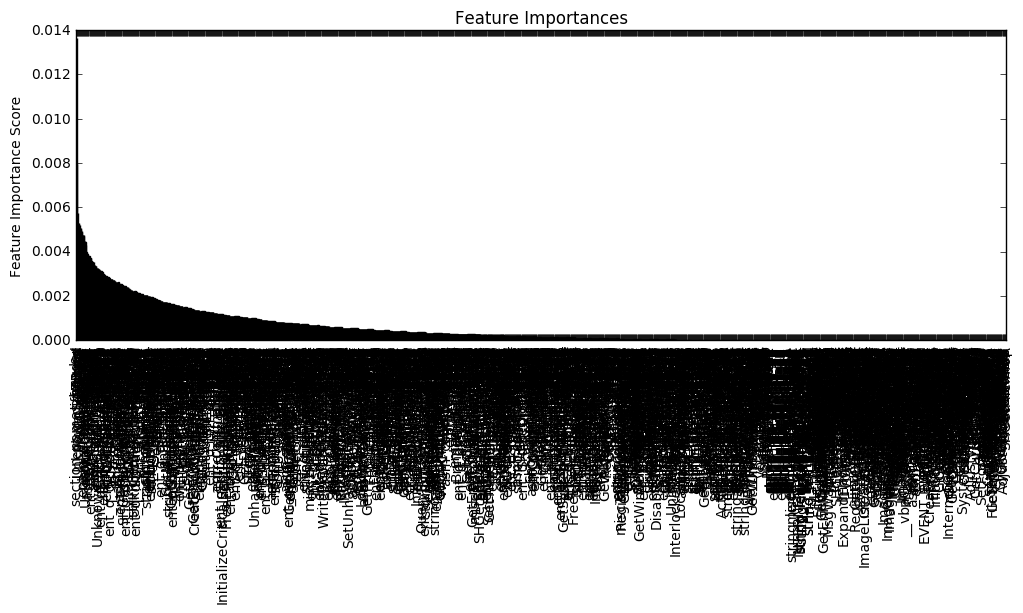

In [5]:
modelfit(gsearch3.best_estimator_, train, predictors)

In [6]:
param_test4 = {'max_features':range(7,20,2)}
gsearch4 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, n_estimators=80,max_depth=11, min_samples_split=1600, min_samples_leaf=50, subsample=0.8, random_state=10),
param_grid = param_test4,n_jobs=4,iid=False, cv=5)
gsearch4.fit(train[predictors],train[target])
gsearch4.grid_scores_, gsearch4.best_params_, gsearch4.best_score_

([mean: 0.99374, std: 0.00123, params: {'max_features': 7},
  mean: 0.99347, std: 0.00074, params: {'max_features': 9},
  mean: 0.99420, std: 0.00095, params: {'max_features': 11},
  mean: 0.99439, std: 0.00107, params: {'max_features': 13},
  mean: 0.99411, std: 0.00115, params: {'max_features': 15},
  mean: 0.99429, std: 0.00063, params: {'max_features': 17},
  mean: 0.99485, std: 0.00068, params: {'max_features': 19}],
 {'max_features': 19},
 0.9948473491451019)

In [7]:
param_test5 = {'subsample':[0.6,0.7,0.75,0.8,0.85,0.9]}
gsearch5 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, n_estimators=80,max_depth=11,min_samples_split=1600, min_samples_leaf=50, subsample=0.8, random_state=10,max_features=19),
param_grid = param_test5,n_jobs=4,iid=False, cv=5)
gsearch5.fit(train[predictors],train[target])
gsearch5.grid_scores_, gsearch5.best_params_, gsearch5.best_score_

([mean: 0.99411, std: 0.00079, params: {'subsample': 0.6},
  mean: 0.99476, std: 0.00132, params: {'subsample': 0.7},
  mean: 0.99476, std: 0.00099, params: {'subsample': 0.75},
  mean: 0.99485, std: 0.00068, params: {'subsample': 0.8},
  mean: 0.99485, std: 0.00124, params: {'subsample': 0.85},
  mean: 0.99512, std: 0.00085, params: {'subsample': 0.9}],
 {'subsample': 0.9},
 0.9951235928623328)


Model Report
Accuracy : 0.9979
CV Score : Mean - 0.9908908 | Std - 0.0008417586 | Min - 0.9894204 | Max - 0.9917279


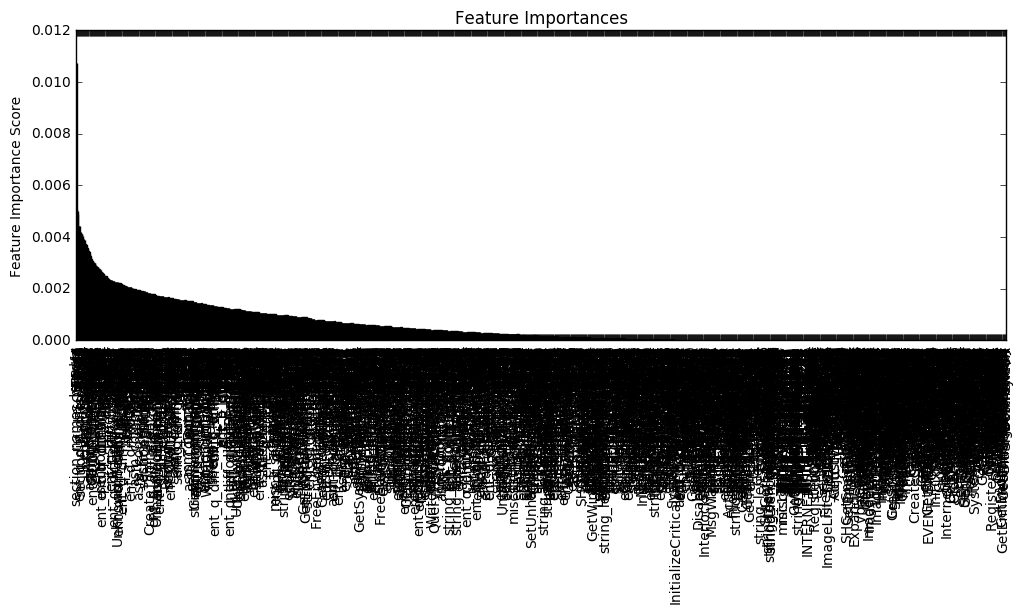

In [8]:
gbm_tuned_1 = GradientBoostingClassifier(learning_rate=0.05, n_estimators=80,max_depth=11, min_samples_split=1600,min_samples_leaf=50, subsample=0.9, random_state=10, max_features=19)
modelfit(gbm_tuned_1, train, predictors)


Model Report
Accuracy : 1
CV Score : Mean - 0.9941114 | Std - 0.0007905393 | Min - 0.9931003 | Max - 0.9953917


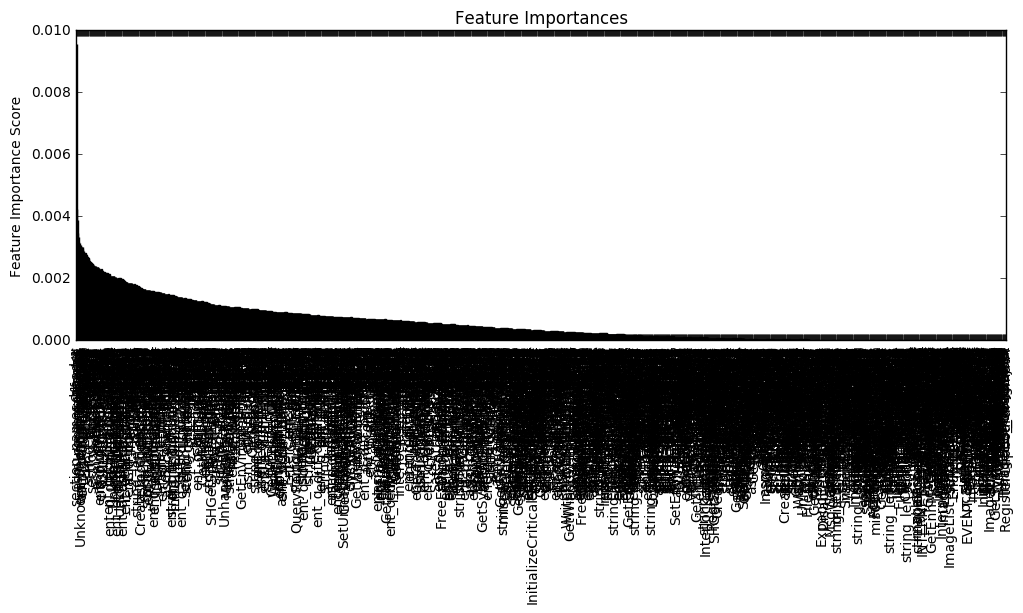

In [9]:
gbm_tuned_2 = GradientBoostingClassifier(learning_rate=0.01, n_estimators=600,max_depth=11, min_samples_split=1600,min_samples_leaf=50, subsample=0.9, random_state=10, max_features=19)
modelfit(gbm_tuned_2, train, predictors)


Model Report
Accuracy : 1


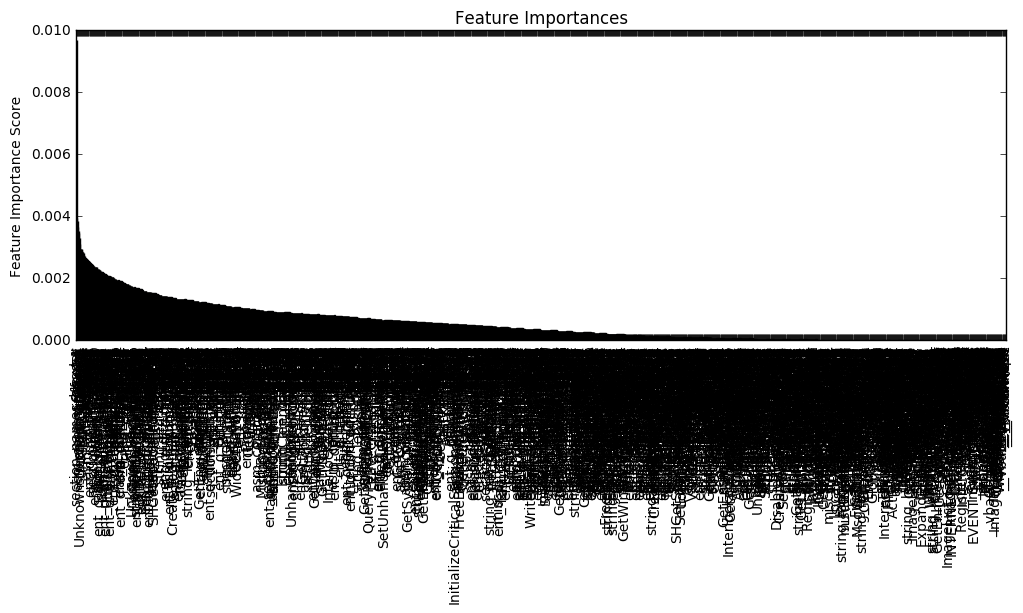

In [10]:
gbm_tuned_3 = GradientBoostingClassifier(learning_rate=0.005, n_estimators=1200,max_depth=11, min_samples_split=1600, min_samples_leaf=50, subsample=0.9, random_state=10, max_features=19,
warm_start=True)
modelfit(gbm_tuned_3, train, predictors, performCV=False)


Model Report
Accuracy : 1


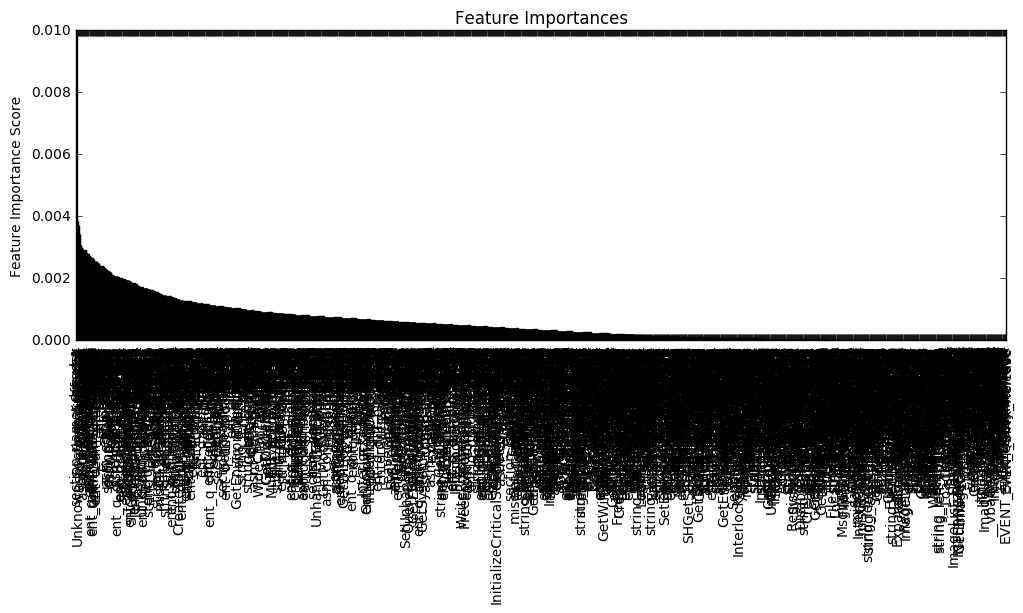

In [11]:
gbm_tuned_4 = GradientBoostingClassifier(learning_rate=0.005, n_estimators=1500,max_depth=11, min_samples_split=1600, min_samples_leaf=50, subsample=0.9, random_state=10, max_features=19,
warm_start=True)
modelfit(gbm_tuned_4, train, predictors, performCV=False)

Confusion matrix , without normalization
[[350   0   0   0   0   0   0   0   0]
 [  0 625   0   0   0   0   0   1   0]
 [  0   0 737   0   0   0   0   0   0]
 [  0   0   0 107   0   0   1   1   0]
 [  0   0   0   0   9   0   0   0   0]
 [  0   0   0   2   0 200   0   1   0]
 [  0   0   0   0   0   0 111   0   0]
 [  2   0   0   1   0   0   0 306   0]
 [  1   0   0   0   0   0   0   0 262]]


<function matplotlib.pyplot.show>

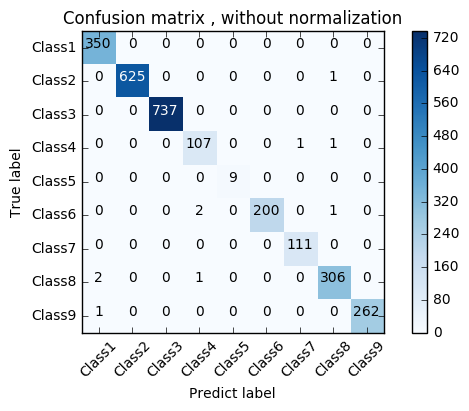

In [4]:
import itertools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.ensemble import GradientBoostingClassifier 
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm , classes , normalize=False , title='Confusion matrix' , cmap=plt.cm.Blues):
    plt.imshow(cm , interpolation='nearest' , cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks , classes , rotation=45)
    plt.yticks(tick_marks , classes)
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:,np.newaxis]
    else:
        print('Confusion matrix , without normalization')
    print(cm)
    
    thresh = cm.max()/2.
    for i , j in itertools.product(range(cm.shape[0]) , range(cm.shape[1])):
        plt.text(j , i , cm[i,j] , horizontalalignment='center' , color='white' if cm[i,j]>thresh else 'black')
    
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predict label')
    
data = pd.read_csv('LargeTrain.csv')
target = 'Class'
train = [x for x in data.columns if x!= target]
class_name = ['Class' + str(x) for x in range(1,10)]
X = data[train]
y = data[target]

X_train , X_test , y_train , y_test = train_test_split(X, y , random_state=0)
clf = GradientBoostingClassifier(n_estimators=80,max_depth=11,min_samples_split=200,min_samples_leaf=50,subsample=0.9,max_features=19)
clf.fit(X_train , y_train)
y_pred = clf.predict(X_test)

cnf_matrix = confusion_matrix(y_test , y_pred)
np.set_printoptions(precision=2)

plt.figure()
plot_confusion_matrix(cnf_matrix,classes=class_name,title='Confusion matrix , without normalization')
plt.show